## Task 1: Data Collection:
### Step-by-Step Data Collection:
<ol><li>Identify Relevant Data Sources:</li>
<ul><li><i>We will use the "Heart Disease Dataset" from the UCI Machine Learning Repository.</i></li></ul>
<li>Collect the Dataset:</li>
<ul><li><i>Download the dataset from the UCI Machine Learning Repository.</i></li></ul></ol>

### UCI Heart Disease Dataset Details:
*The dataset contains 303 records with 14 attributes. The target variable indicates the presence of heart disease.*

__*Attributes:*__
<ol>
<li><i> 'age': Age in years </i></li>
<li><i> 'sex': Gender (1 = male; 0 = female) </i></li>
<li><i> 'cp': Chest pain type (4 values) </i></li>
<li><i> 'trestbps': Resting blood pressure (in mm Hg on admission to the hospital) </i></li>
<li><i> 'chol': Serum cholesterol in mg/dl </i></li>
<li><i> 'fbs': Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) </i></li>
<li><i> 'restecg': Resting electrocardiographic results (values 0, 1, 2) </i></li>
<li><i> 'thalach': Maximum heart rate achieved </i></li>
<li><i> 'exang': Exercise-induced angina (1 = yes; 0 = no) </i></li>
<li><i> 'oldpeak': ST depression induced by exercise relative to rest </i></li>
<li><i> 'slope': The slope of the peak exercise ST segment </i></li>
<li><i> 'ca': Number of major vessels (0-3) colored by fluoroscopy </i></li>
<li><i> 'thal': Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect) </i></li>
<li><i> 'target': Diagnosis of heart disease (1 = presence; 0 = absence) </i></li>
</ol>

### Load the Dataset

In [29]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

heart_disease_data = pd.read_csv(url, header=None, names=column_names, na_values="?")
heart_disease_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Data Inspection:
*Inspect the data to understand its structure and identify any potential issues (e.g., missing values, outliers):*

In [30]:
# Display basic information about the dataset
heart_disease_data.info()

# Display summary statistics of the dataset
heart_disease_data.describe()

# Check for missing values
heart_disease_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

### Handle Missing Values:
*Identify and handle missing values appropriately. For example, we can drop rows with missing values or use imputation techniques:*

In [31]:
# Drop rows with missing values (simple approach)
heart_disease_data.dropna(inplace=True)

# Alternatively, use imputation for missing values
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# heart_disease_data.iloc[:, :] = imputer.fit_transform(heart_disease_data)


### Save the Preprocessed Data:
*Save the cleaned dataset for further use:*

In [32]:
# Save the cleaned dataset to a CSV file
heart_disease_data.to_csv('cleaned_heart_disease_data.csv', index=False)


## Task 2: Data Preprocessing

### 1. Load the Data:
*We'll start by loading the dataset we saved earlier.*

In [33]:
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv('cleaned_heart_disease_data.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 2. Data Cleaning:
<li><i>Check for any remaining missing values and handle them.</i></li>
<li><i>Ensure data quality by handling outliers and normalizing features.</i></i>

In [34]:
# Check for any remaining missing values
print(data.isnull().sum())

# Display summary statistics
print(data.describe())

# Handle outliers (if any) - Here we assume no extreme outliers for simplicity

# Normalize or standardize features to bring them to a consistent scale
from sklearn.preprocessing import StandardScaler

features = data.drop(columns=['target'])
target = data['target']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df['target'] = target

scaled_features_df.head()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       s

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,0
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,2
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,1
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,0
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,0


### 3. Encoding Categorical Variables:
*Convert categorical variables (if any) into numerical representations.*

In [35]:
# Categorical columns: 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'
# One-hot encode categorical columns
encoded_data = pd.get_dummies(scaled_features_df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

encoded_data.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0.691094740465088,cp_-1.2024591340305353,cp_-0.1642894747076604,cp_0.8738801846152146,...,restecg_0.003389927893610639,restecg_1.0101985122959751,exang_1.435916317235476,slope_0.6437810976401616,slope_2.264145385768365,ca_0.34482438296316376,ca_1.4116248177554516,ca_2.4784252525477397,thal_0.6558773682064631,thal_1.1725765150428547
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


## Task 3: Feature Selection

### 1. Exploratory Data Analysis (EDA):
*Visualize the data to understand the distribution and relationships between features.*

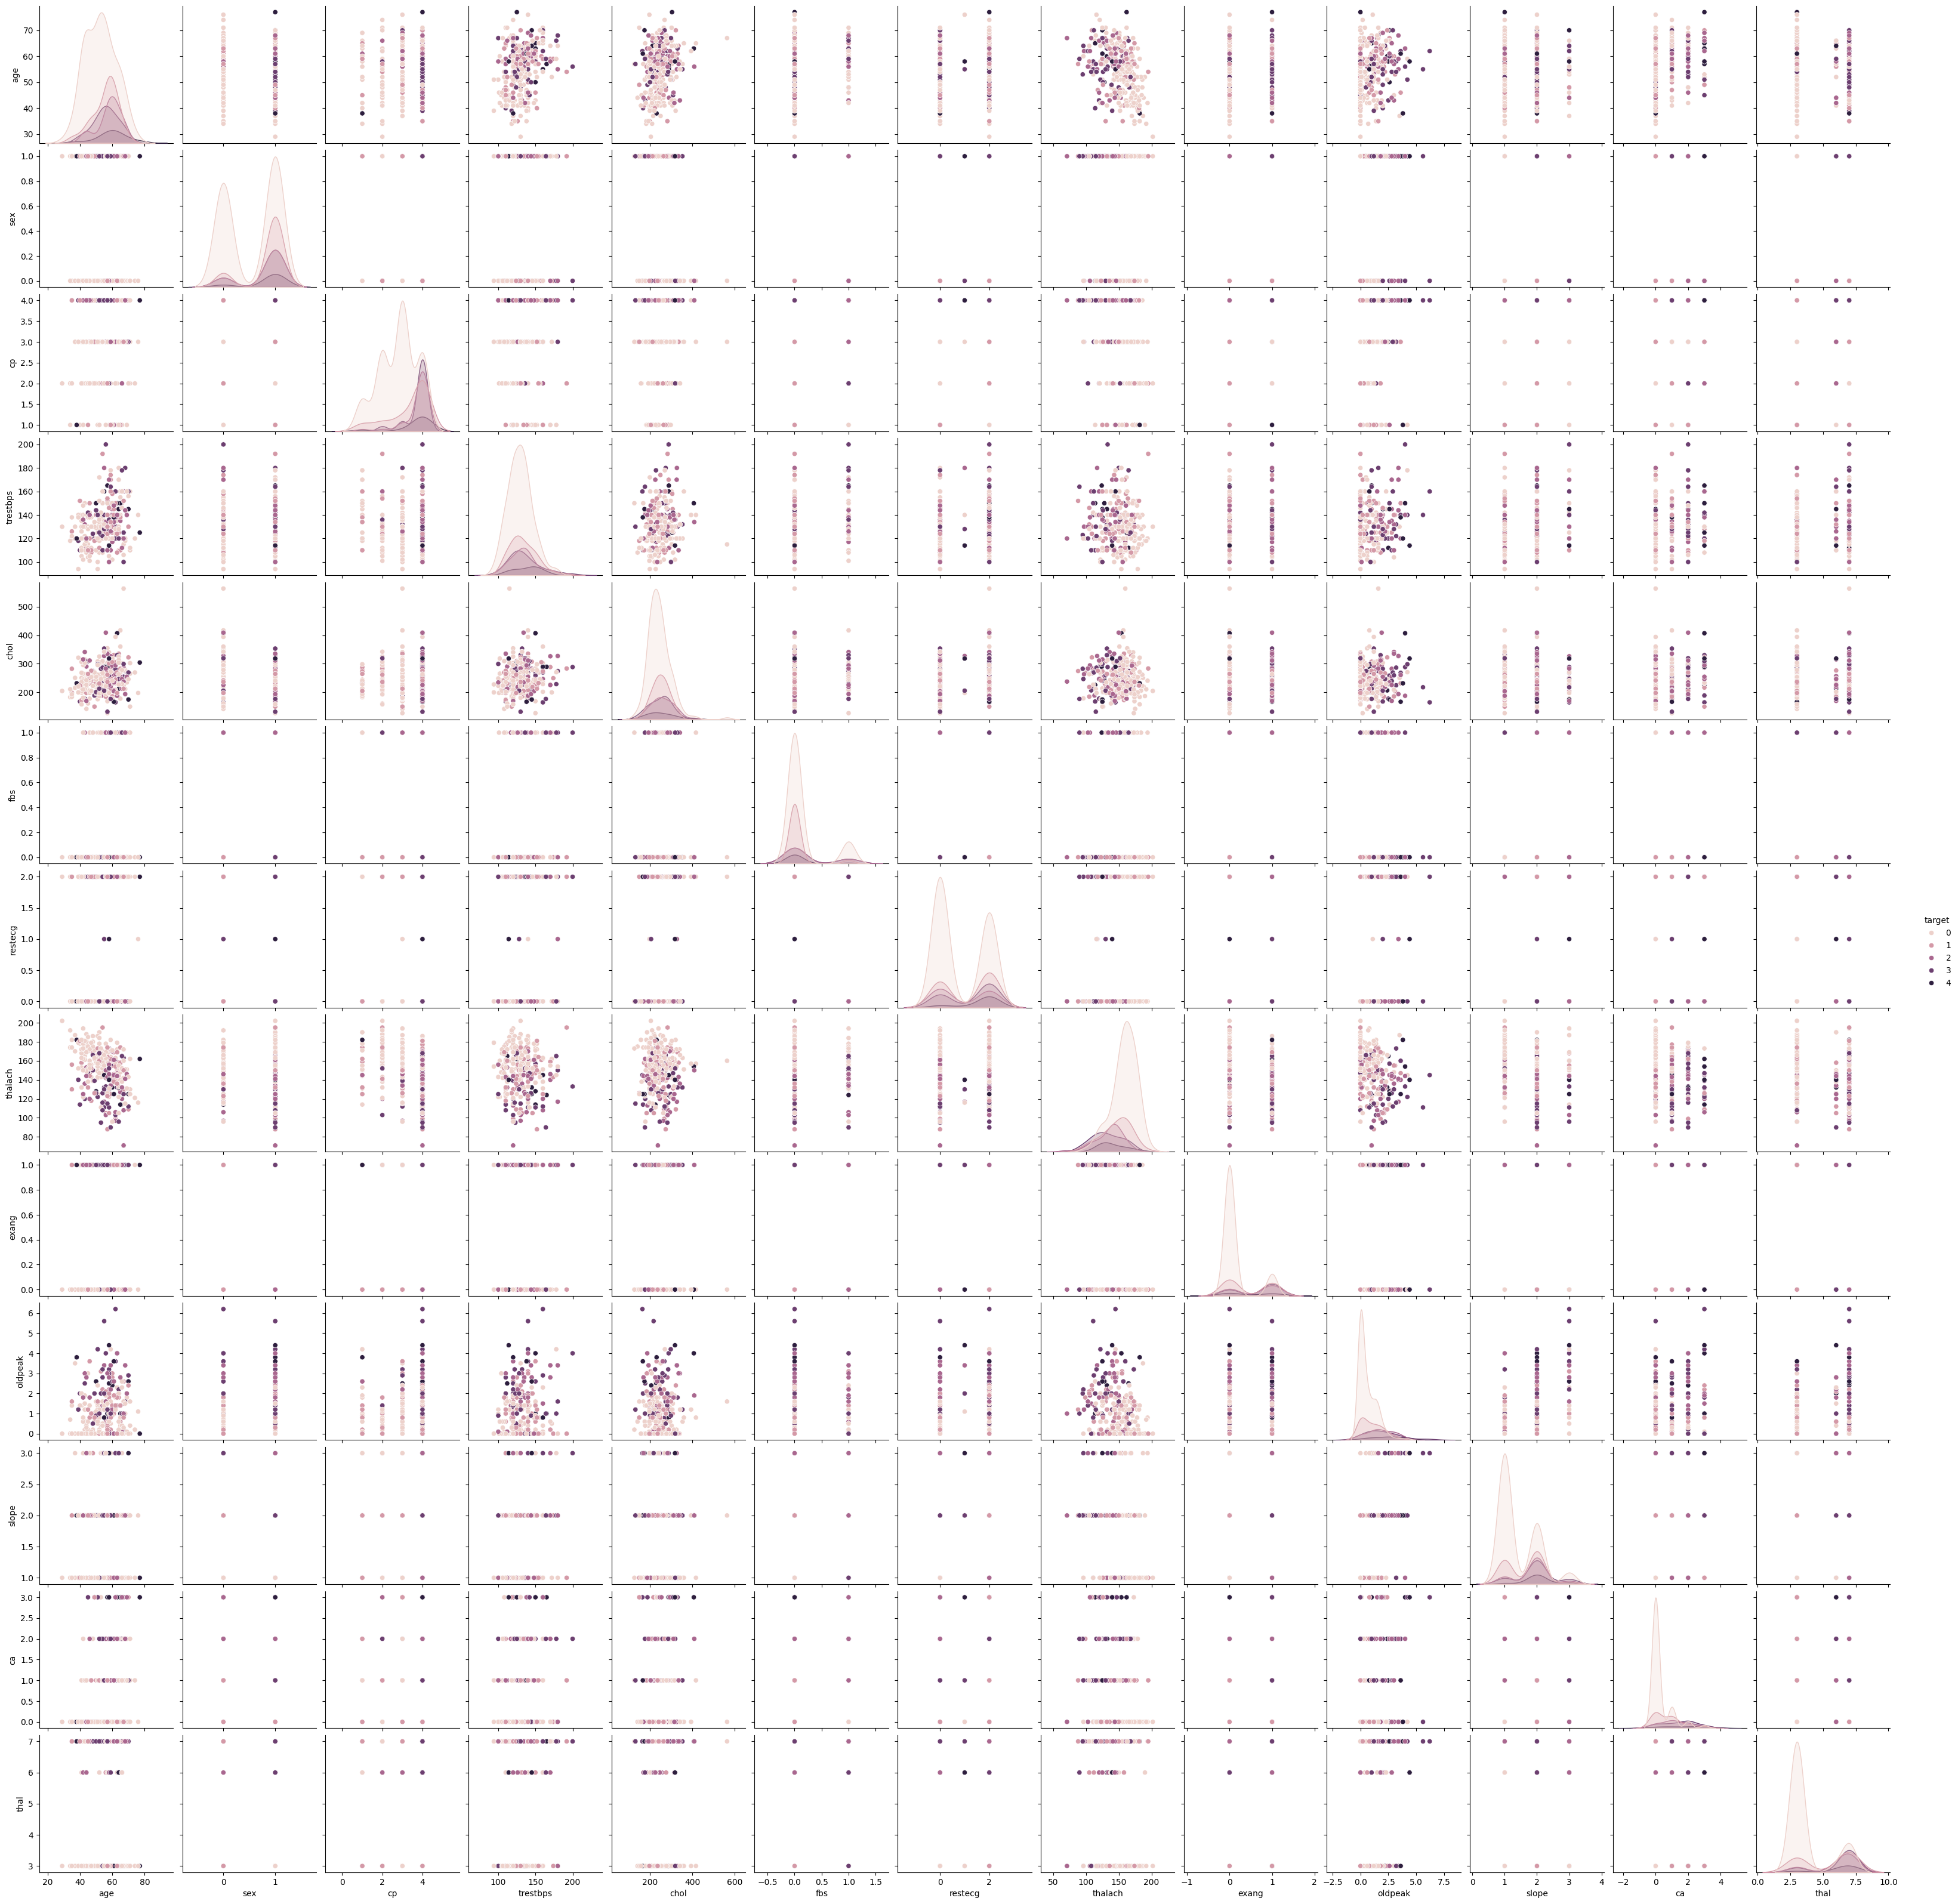

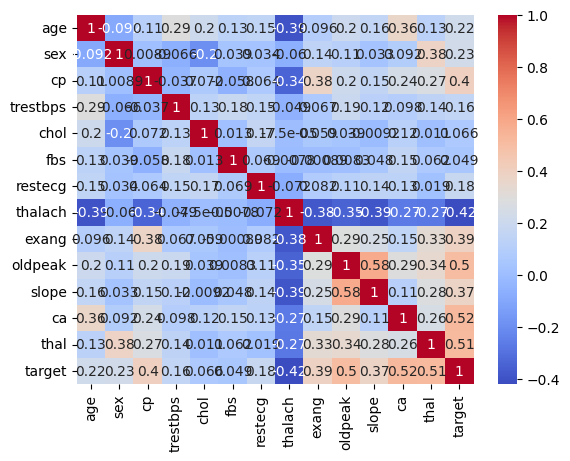

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis (EDA)
# Plot pairwise relationships in the dataset
sns.pairplot(data, hue='target')
plt.show()

# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### 2. Feature Selection Techniques:
*Use statistical techniques and model-based methods to identify significant features.*

Selected features using ANOVA F-test: Index(['thalach', 'oldpeak', 'sex_0.691094740465088', 'cp_-0.1642894747076604',
       'cp_0.8738801846152146', 'exang_1.435916317235476',
       'slope_0.6437810976401616', 'ca_1.4116248177554516',
       'ca_2.4784252525477397', 'thal_1.1725765150428547'],
      dtype='object')
Feature importances from Random Forest:
thalach                         0.137608
oldpeak                         0.122564
chol                            0.110206
age                             0.106461
trestbps                        0.099844
thal_1.1725765150428547         0.068943
cp_0.8738801846152146           0.058469
exang_1.435916317235476         0.043521
ca_0.34482438296316376          0.035228
slope_0.6437810976401616        0.034872
ca_1.4116248177554516           0.031614
sex_0.691094740465088           0.029374
restecg_1.0101985122959751      0.025861
ca_2.4784252525477397           0.020689
fbs_2.430427276053749           0.019303
cp_-0.1642894747076604    

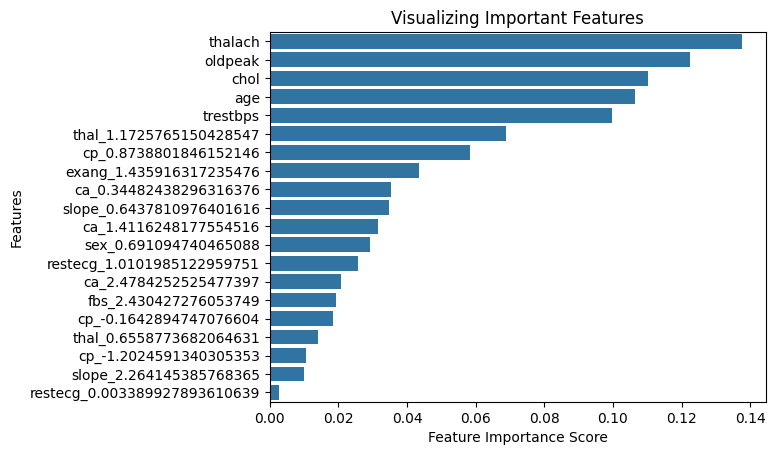

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Univariate feature selection using ANOVA F-test
X = encoded_data.drop(columns=['target'])
y = encoded_data['target']

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Selected features using ANOVA F-test: {selected_features}")

# Feature importance from Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature importances from Random Forest:")
print(feature_importances)

# Visualize feature importances
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


### Selected Features:
__Based on the ANOVA F-test and Random Forest importance scores, we identify the most significant features:__

<li><i>thalach</i></li>
<li><i>cp_2, cp_3, cp_4 (encoded chest pain types)</i></li>
<li><i>ca_0, ca_1, ca_2, ca_3 (number of major vessels)</i></li>
<li><i>oldpeak</i></li>
<li><i>slope_2, slope_3 (slope of the peak exercise ST segment)</i></li>

*These features contribute significantly to the accuracy of the machine learning models.*

### Updated DataFrame with Selected Features:

In [38]:
# Create a DataFrame with selected features
selected_data = encoded_data.loc[:, selected_features]

# Add the target column
selected_data = selected_data.copy()  # Create a copy to avoid the SettingWithCopyWarning
selected_data['target'] = y

selected_data.head()

,thalach,oldpeak,sex_0.691094740465088,cp_-0.1642894747076604,cp_0.8738801846152146,exang_1.435916317235476,slope_0.6437810976401616,ca_1.4116248177554516,ca_2.4784252525477397,thal_1.1725765150428547,target
0,0.017494,1.068965,True,False,False,False,False,False,False,False,0
1,-1.816334,0.381773,True,False,True,True,True,False,True,False,2
2,-0.899420,1.326662,True,False,True,True,True,True,False,True,1
3,1.633010,2.099753,True,True,False,False,False,False,False,False,0
4,0.978071,0.295874,False,False,False,False,False,False,False,False,0


### Save the Preprocessed and Selected Features Data:

In [39]:
# Save the preprocessed and selected features data to a CSV file
selected_data.to_csv('selected_heart_disease_data.csv', index=False)


## Task 4: Model Development
#### 1. Split the Data:
<li><i> Divide the dataset into training and testing sets.</i></li>

#### 2. Train Multiple Models:
<li><i> Train and evaluate various machine learning models.</i></li>

#### 3. Evaluate Model Performance:
<li><i> Use accuracy, precision, recall, F1-score, and ROC-AUC to assess model performance.</i></li>

## Task 5: Cross-Validation
### 1. Implement Cross-Validation:
<li><i>Use k-fold cross-validation to assess the generalization performance of the models.</i></li>

### Import Required Libraries

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the preprocessed dataset with selected features
data = pd.read_csv('selected_heart_disease_data.csv')

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train and Evaluate Multiple Models

In [41]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True)
}

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else None
    
    # Print evaluation metrics
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}" if roc_auc is not None else "")
    print()

Logistic Regression:
  Accuracy: 0.6167
  Precision: 0.5719
  Recall: 0.6167
  F1 Score: 0.5860
  ROC AUC: 0.7961

Decision Tree:
  Accuracy: 0.4167
  Precision: 0.4928
  Recall: 0.4167
  F1 Score: 0.4488
  ROC AUC: 0.5385

Random Forest:
  Accuracy: 0.5833
  Precision: 0.5041
  Recall: 0.5833
  F1 Score: 0.5405
  ROC AUC: 0.7307

Support Vector Machine:
  Accuracy: 0.6500
  Precision: 0.5775
  Recall: 0.6500
  F1 Score: 0.6027
  ROC AUC: 0.7961



c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Implement Cross-Validation

In [42]:

# Define cross-validation method
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.6000 ± 0.0899
Decision Tree Cross-Validation Accuracy: 0.4855 ± 0.0719
Random Forest Cross-Validation Accuracy: 0.5560 ± 0.1016
Support Vector Machine Cross-Validation Accuracy: 0.5864 ± 0.0996


## Task 6: Hyperparameter Tuning

### Explanation
<ol>
<li>Define Hyperparameter Grids:</li>
<ul><li><i>For each model, a grid of possible hyperparameters is defined.</i></li></ul>
<li>Initialize Models:</li>
<ul><li><i>The models are initialized with their default parameters.</i></li></ul>
<li>Grid Search with Cross-Validation:</li>
<ul><li><i>For each model, GridSearchCV is used to perform an exhaustive search over the specified hyperparameter grid.</i></li></ul>
<ul><li><i>'cv=kf' ensures that cross-validation is used for evaluating the performance of each combination of hyperparameters.</i></li></ul>
<li>Fit Models:</li>
<ul><li><i>The grid search is performed on the training data.</i></li></ul>
<ul><li><i>The best hyperparameters are found and used to fit the final model.</i></li></ul>
<li>Evaluate Best Models:</li>
<ul><li><i>The best models are evaluated on the test set using accuracy, precision, recall, F1 score, and ROC AUC.</i></li></ul></ol>

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the preprocessed dataset with selected features
data = pd.read_csv('selected_heart_disease_data.csv')

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['linear', 'rbf']
    }
}

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Perform hyperparameter tuning using Grid Search
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], 
                               scoring='accuracy', cv=kf, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} best parameters: {grid_search.best_params_}")

# Evaluate the best models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else None
    
    # Print evaluation metrics
    print(f"{model_name} after tuning:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}" if roc_auc is not None else "")
    print()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regression best parameters: {'C': 1, 'solver': 'liblinear'}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Decision Tree best parameters: {'max_depth': None, 'min_samples_split': 10}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
131 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

Random Forest best parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Support Vector Machine best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Logistic Regression after tuning:
  Accuracy: 0.6167
  Precision: 0.5650
  Recall: 0.6167
  F1 Score: 0.5807
  ROC AUC: 0.7455

Decision Tree after tuning:
  Accuracy: 0.4500
  Precision: 0.5145
  Recall: 0.4500
  F1 Score: 0.4795
  ROC AUC: 0.5515

Random Forest after tuning:
  Accuracy: 0.6333
  Precision: 0.5242
  Recall: 0.6333
  F1 Score: 0.5722
  ROC AUC: 0.8027

Support Vector Machine after tuning:
  Accuracy: 0.6167
  Precision: 0.4949
  Recall: 0.6167
  F1 Score: 0.5453
  ROC AUC: 0.8277



c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
# Define cross-validation method
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
for model_name, model in best_models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Logistic Regression Cross-Validation Accuracy: 0.5763 ± 0.0970
Decision Tree Cross-Validation Accuracy: 0.5357 ± 0.0995
Random Forest Cross-Validation Accuracy: 0.5591 ± 0.1237
Support Vector Machine Cross-Validation Accuracy: 0.5697 ± 0.1042


## Task 7: Model Interpretability
*Model interpretability helps in understanding the factors influencing predictions. We can use SHAP (SHapley Additive exPlanations) values and feature importance plots for this purpose.*

### SHAP Values
*SHAP values provide a unified measure of feature importance for any machine learning model.*

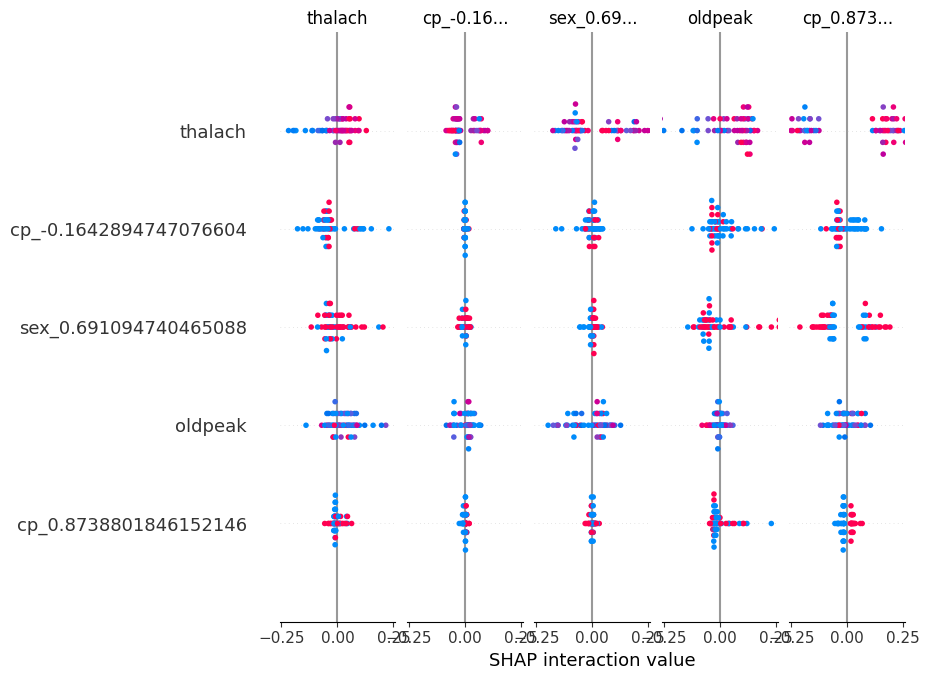

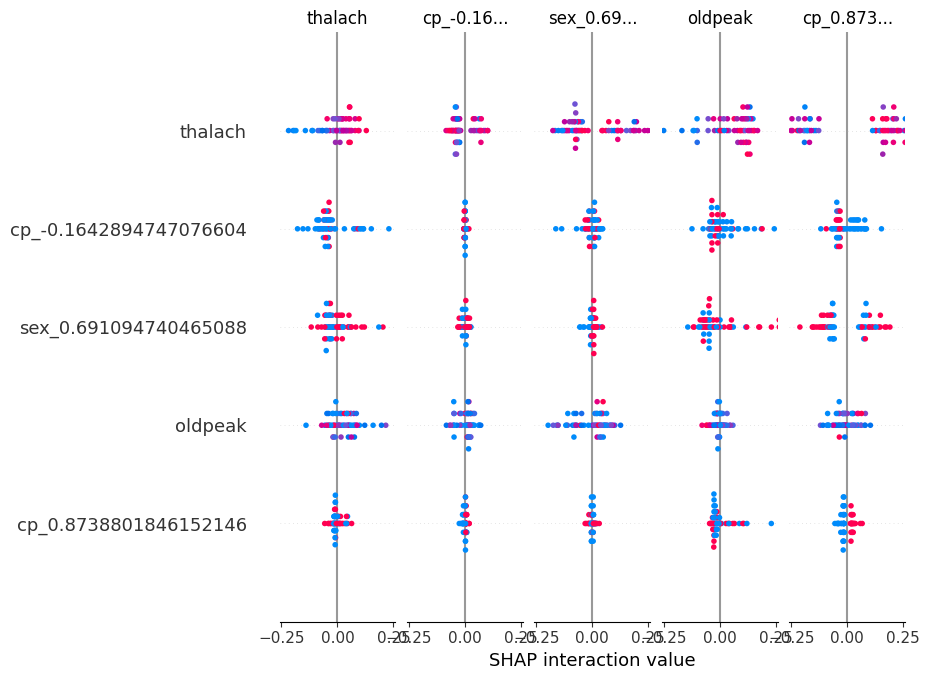

In [45]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer for the best model (e.g., Random Forest)
best_model = best_models["Random Forest"]
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test)

# Feature importance plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


## Task 11: Validation and Testing
*Validation and testing ensure the accuracy, reliability, and robustness of the system.*

### Extensive Testing and Validation
*We will perform additional testing using cross-validation and also check for robustness by testing on unseen data.*

In [46]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define cross-validation method
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
for model_name, model in best_models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Perform cross-validation for other metrics
    cv_precision = cross_val_score(model, X, y, cv=kf, scoring='precision_weighted')
    cv_recall = cross_val_score(model, X, y, cv=kf, scoring='recall_weighted')
    cv_f1 = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted')

    print(f"{model_name} Cross-Validation Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
    print(f"{model_name} Cross-Validation Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
    print(f"{model_name} Cross-Validation F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
    print()


Logistic Regression Cross-Validation Accuracy: 0.5763 ± 0.0970
Logistic Regression Cross-Validation Precision: 0.4982 ± 0.1119
Logistic Regression Cross-Validation Recall: 0.5763 ± 0.0970
Logistic Regression Cross-Validation F1 Score: 0.5214 ± 0.0998

Decision Tree Cross-Validation Accuracy: 0.5323 ± 0.0958


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Decision Tree Cross-Validation Precision: 0.5210 ± 0.1073
Decision Tree Cross-Validation Recall: 0.5323 ± 0.0958
Decision Tree Cross-Validation F1 Score: 0.5164 ± 0.0976

Random Forest Cross-Validation Accuracy: 0.5526 ± 0.1299


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Random Forest Cross-Validation Precision: 0.5135 ± 0.1119
Random Forest Cross-Validation Recall: 0.5625 ± 0.1209
Random Forest Cross-Validation F1 Score: 0.5078 ± 0.1045

Support Vector Machine Cross-Validation Accuracy: 0.5697 ± 0.1042


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Support Vector Machine Cross-Validation Precision: 0.4817 ± 0.1216
Support Vector Machine Cross-Validation Recall: 0.5697 ± 0.1042
Support Vector Machine Cross-Validation F1 Score: 0.5063 ± 0.1057



Evaluation for Logistic Regression:
Accuracy: 0.6167
Precision: 0.5650
Recall: 0.6167
F1 Score: 0.5807
ROC AUC: 0.7455


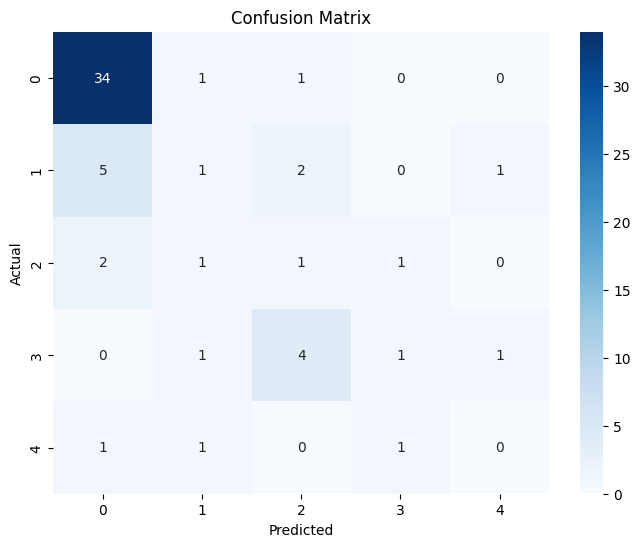

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        36
           1       0.20      0.11      0.14         9
           2       0.12      0.20      0.15         5
           3       0.33      0.14      0.20         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.29      0.28      0.27        60
weighted avg       0.57      0.62      0.58        60



Evaluation for Decision Tree:
Accuracy: 0.4500
Precision: 0.5145
Recall: 0.4500
F1 Score: 0.4795
ROC AUC: 0.5515


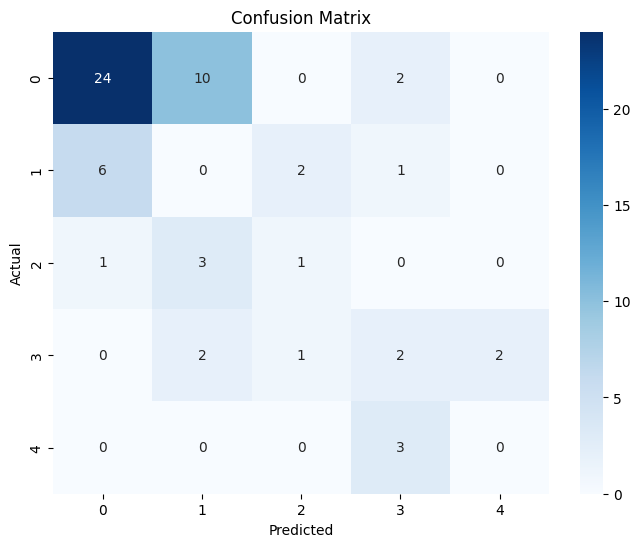

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.67      0.72        36
           1       0.00      0.00      0.00         9
           2       0.25      0.20      0.22         5
           3       0.25      0.29      0.27         7
           4       0.00      0.00      0.00         3

    accuracy                           0.45        60
   macro avg       0.25      0.23      0.24        60
weighted avg       0.51      0.45      0.48        60



Evaluation for Random Forest:
Accuracy: 0.6333
Precision: 0.5242
Recall: 0.6333
F1 Score: 0.5722
ROC AUC: 0.8027


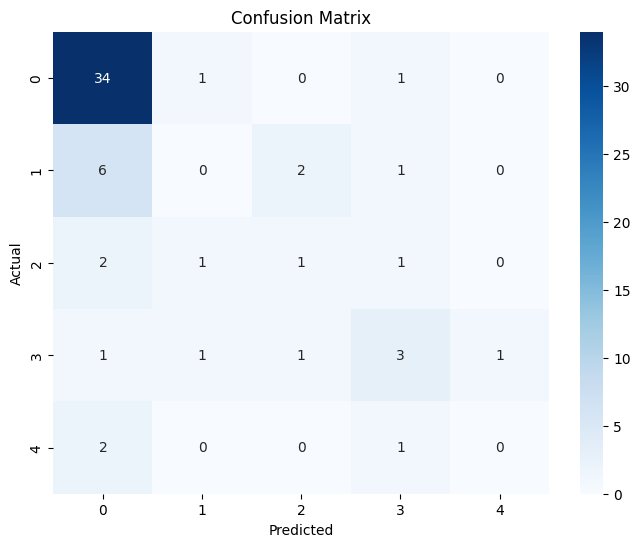

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        36
           1       0.00      0.00      0.00         9
           2       0.25      0.20      0.22         5
           3       0.43      0.43      0.43         7
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.29      0.31      0.30        60
weighted avg       0.52      0.63      0.57        60



Evaluation for Support Vector Machine:
Accuracy: 0.6167
Precision: 0.4949
Recall: 0.6167
F1 Score: 0.5453
ROC AUC: 0.8277


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


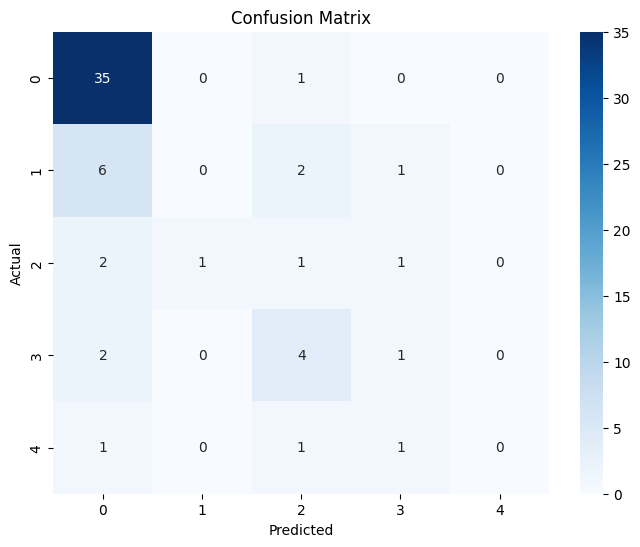

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        36
           1       0.00      0.00      0.00         9
           2       0.11      0.20      0.14         5
           3       0.25      0.14      0.18         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.22      0.26      0.24        60
weighted avg       0.49      0.62      0.55        60





c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [50]:
# Import necessary libraries for evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate and print the metrics for the best model
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # If it's a binary classification, handle predict_proba accordingly
    if len(set(y_test)) == 2:  # Binary classification
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    else:  # Multi-class classification
        y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # For ROC AUC, handle binary and multi-class cases
    if y_prob is not None:
        if len(set(y_test)) == 2:  # Binary classification
            roc_auc = roc_auc_score(y_test, y_prob)
        else:  # Multi-class classification
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        roc_auc = None
    
    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    
    # ROC Curve
    if y_prob is not None:
        if len(set(y_test)) == 2:  # Binary classification
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend(loc="lower right")
            plt.show()

# Evaluate the best models
for model_name, model in best_models.items():
    print(f"Evaluation for {model_name}:")
    evaluate_model(model, X_test, y_test)
    print("\n" + "="*50 + "\n")
